<a href="https://colab.research.google.com/github/lordoz234/ML/blob/master/classifier26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [950]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
data = pd.read_csv('/content/drive/My Drive/files/ku2.csv')

In [953]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   files                         2503 non-null   object 
 1   is_eulerian                   2503 non-null   bool   
 2   degree                        2503 non-null   int64  
 3   is_multigraphical             2503 non-null   bool   
 4   is_pseudographical            2503 non-null   bool   
 5   maximal_matching              2503 non-null   int64  
 6   number_of_cliques             2503 non-null   int64  
 7   rich_club_coefficient         2503 non-null   float64
 8   average_shortest_path_length  2503 non-null   float64
 9   s_metric                      2503 non-null   float64
 10  wiener_index                  2503 non-null   float64
 11  population                    2503 non-null   object 
 12  super_population              2503 non-null   object 
dtypes: 

In [954]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
912,HG04183.txt,False,710,True,True,653,668,0.026623,1.973377,35176761.0,439625.0,BEB,SAS
745,NA19206.txt,False,712,True,True,21,690,0.037025,1.962975,77457601.0,466609.0,YRI,AFR
2006,HG02307.txt,False,713,True,True,23,672,0.037999,1.962001,73393489.0,442345.0,ACB,AFR


In [0]:
data['is_eulerian'] = data['is_eulerian'].map({True: 1, False: 0})
data['is_multigraphical'] = data['is_multigraphical'].map({True: 1, False: 0})
data['is_pseudographical'] = data['is_pseudographical'].map({True: 1, False: 0})

In [956]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
2046,NA12348.txt,1,710,0,0,13,662,0.023913,1.976087,27373824.0,432350.0,CEU,EUR
2021,HG04206.txt,0,710,0,0,19,648,0.027434,1.972566,33074001.0,413505.0,ITU,SAS
2172,HG01341.txt,0,715,1,1,21,648,0.033426,1.966574,49098049.0,412249.0,CLM,AMR


In [0]:
data['population'] = data['population'].map({'ASW': 1, 'YRI': 2, 'LWK': 3, 'JPT': 4, 'CDX': 5, 'CEU': 6, 'CHB': 7, 'GIH': 8, 'GWD': 9, 'MSL': 10, 'IBS': 11, 
                                             'TSI': 12, 'PJL': 13, 'ESN': 14, 'MXL': 15, 'CLM': 16, 'PEL': 17, 'CHS': 18, 'PUR': 19, 'FIN': 20, 'KHV': 21,
                                             'BEB': 22, 'ACB': 23, 'ITU': 24, 'GBR': 25, 'STU': 26})
data['super_population'] = data['super_population'].map({'EUR': 1, 'EAS': 2, 'AMR': 3, 'SAS': 4, 'AFR': 5})

In [958]:
data.set_index(["super_population", "population"]).count(level="super_population")

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index
super_population,,,,,,,,,,,
1,503,503,503,503,503,503,503,503,503,503,503
2,504,504,504,504,504,504,504,504,504,504,504
3,347,347,347,347,347,347,347,347,347,347,347
4,489,489,489,489,489,489,489,489,489,489,489
5,660,660,660,660,660,660,660,660,660,660,660


In [959]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
1970,NA19077.txt,1,716,0,0,17,664,0.023842,1.976158,27541504.0,434984.0,4,2
1817,NA07048.txt,1,710,1,1,12,640,0.006240,1.993760,1628176.0,407684.0,6,1
472,HG01028.txt,0,716,1,1,20,643,0.030668,1.969332,40068900.0,406476.0,5,2


In [960]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   files                         2503 non-null   object 
 1   is_eulerian                   2503 non-null   int64  
 2   degree                        2503 non-null   int64  
 3   is_multigraphical             2503 non-null   int64  
 4   is_pseudographical            2503 non-null   int64  
 5   maximal_matching              2503 non-null   int64  
 6   number_of_cliques             2503 non-null   int64  
 7   rich_club_coefficient         2503 non-null   float64
 8   average_shortest_path_length  2503 non-null   float64
 9   s_metric                      2503 non-null   float64
 10  wiener_index                  2503 non-null   float64
 11  population                    2503 non-null   int64  
 12  super_population              2503 non-null   int64  
dtypes: 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X, y = data.drop(['population','files', 'super_population'], axis = 1), data['population']

In [962]:
X.shape, y.shape

((2503, 10), (2503,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_holdout,  y_train, y_holdout = \
    train_test_split(X, y, test_size=.2, random_state=251)
#X_train = scaler.fit_transform(X_train)

In [0]:
from sklearn import preprocessing
#X_train = preprocessing.scale(X_train, axis=0)

In [966]:
X_train.shape, X_holdout.shape

((2002, 10), (501, 10))

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree_clf = DecisionTreeClassifier(random_state=241)

In [969]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=241, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit, RepeatedKFold, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
from tqdm import tqdm_notebook

In [0]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=241)
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=241)
rskf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=241)

In [996]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(50, 100)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = KNeighborsClassifier(n_neighbors=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


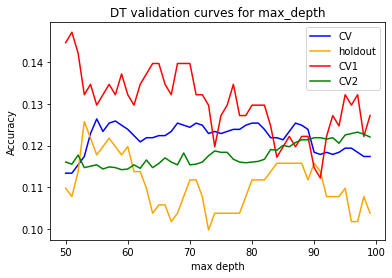

In [997]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [975]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(6, 20)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = DecisionTreeClassifier(max_depth=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


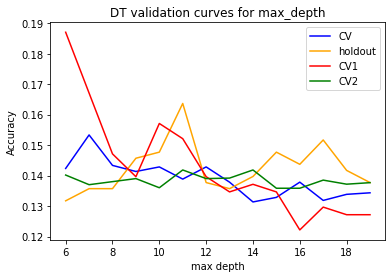

In [976]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [977]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(6, 20)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = RandomForestClassifier(max_depth=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


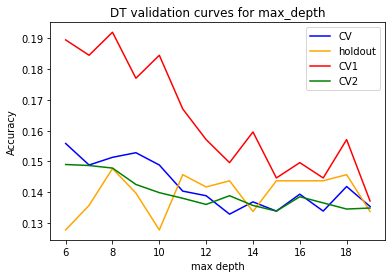

In [978]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [979]:
print(max(cv_accuracies_by_death_1))

0.19201995012468828


In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
rnd_clf = RandomForestClassifier(max_depth=9) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=11)
knn_clf = KNeighborsClassifier(n_neighbors=43)
voting_clf = VotingClassifier(estimators=[ ('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')
params = {'max_depth': np.arange(2, 100)}
params1 = {'n_neighbors': np.arange(2, 100)}
best_neigh = GridSearchCV(estimator=rnd_clf, param_grid=params, scoring='accuracy', cv = cv)
best_neigh.fit(X_train, y_train)
best_neigh1 = GridSearchCV(estimator=dt_clf, param_grid=params, scoring='accuracy', cv = cv)
best_neigh1.fit(X_train, y_train)
best_neigh2 = GridSearchCV(estimator=knn_clf, param_grid=params1, scoring='accuracy', cv = cv)
best_neigh2.fit(X_train, y_train)
rnd_clf = RandomForestClassifier(max_depth=best_neigh.best_params_['max_depth']) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=best_neigh1.best_params_['max_depth'])
knn_clf = KNeighborsClassifier(n_neighbors=best_neigh2.best_params_['n_neighbors'])
voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')

In [982]:
print(best_neigh.best_params_)
print(best_neigh.best_score_)
print(best_neigh1.best_params_)
print(best_neigh1.best_score_)
print(best_neigh2.best_params_)
print(best_neigh2.best_score_)
rnd_clf = RandomForestClassifier(max_depth=8, random_state=241) 
dt_clf = DecisionTreeClassifier(random_state=241, max_depth=7)
knn_clf = KNeighborsClassifier(n_neighbors=121)
tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')

{'max_depth': 4}
0.19950124688279303
{'max_depth': 6}
0.18703241895261846
{'n_neighbors': 51}
0.14713216957605985


In [983]:
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
print(tree_cv_score)

0.16957605985037408


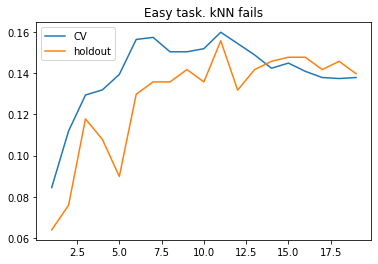

In [984]:
cv_scores, holdout_scores = [], []
n_neighb = np.arange(1, 20, 1)

for k in n_neighb:

    tree = DecisionTreeClassifier(random_state=234, max_depth=k)
    cv_scores.append(np.mean(cross_val_score(tree, X_train, y_train, cv=skf)))
    tree.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, tree.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [985]:
print(max(cv_scores))

0.15984015984015984


In [986]:
tree = DecisionTreeClassifier(random_state=17, max_depth=11)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=skf))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 0.15784215784215783, holdout: 0.15768463073852296


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

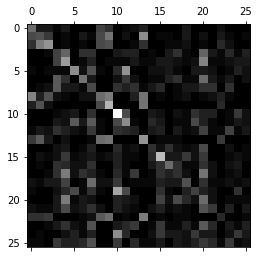

In [988]:
tree = DecisionTreeClassifier(random_state=17, max_depth=11)
#print(X_train.shape, y_train.shape)
y_pred = cross_val_predict(tree, X_train, y_train, cv = skf)
#print(y_train.shape, y_pred.shape)
conf_m = confusion_matrix(y_train, y_pred)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

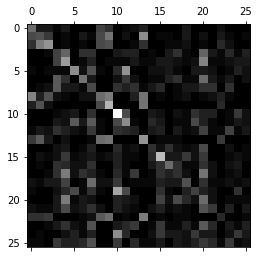

In [989]:
row_sums = conf_m.sum(axis=1,keepdims=True)
norm_conf_mx = conf_m / row_sums 
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

In [0]:
from sklearn.metrics import classification_report

In [991]:
target_names = ['0', '1', '2', '3', '4']
print(classification_report(y_train, y_pred, target_names=target_names))

ValueError: ignored

In [992]:
lr_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_depth=9, random_state=17) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=11)
knn_clf = KNeighborsClassifier(n_neighbors=43)
rnd_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[ ('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rnd',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=9,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
          

In [993]:
y_pred = lr_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = rnd_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = dt_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = knn_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = voting_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))

0.059880239520958084
0.1377245508982036
0.15768463073852296
0.11377245508982035
0.13572854291417166


In [994]:
tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Voiting. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Voiting. CV: 0.1745635910224439, holdout: 0.13572854291417166


In [1004]:
from sklearn.ensemble import BaggingClassifier
temp, temp1 = 0, 0
a, b, c = 0, 0, 0
a1, b1, c1 = 0, 0, 0
for curr_max_depth in tqdm_notebook(np.arange(4, 10)):
    for curr_max_depth1 in np.arange(4, 10):
        for curr_n_neight in np.arange(50, 90):
            rnd_clf = RandomForestClassifier(max_depth=curr_max_depth, random_state=241) 
            dt_clf = DecisionTreeClassifier(random_state=241, max_depth=curr_max_depth1)
            knn_clf = KNeighborsClassifier(n_neighbors=curr_n_neight)
            tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
            tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
            tree.fit(X_train, y_train)
            tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
            if temp < tree_cv_score:
                temp = tree_cv_score
                a = curr_max_depth
                b = curr_max_depth1
                c = curr_n_neight
            if temp1 < tree_holdout_score:
                temp1 = tree_holdout_score
                a1 = curr_max_depth
                b1 = curr_max_depth1
                c1 = curr_n_neight
print(temp)
print(a, b, c)
print(temp1)
print(a1, b1, c1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



0.19451371571072318
5 7 64
0.1377245508982036
9 9 70


In [0]:
from sklearn.ensemble import BaggingClassifier
dt_clf = RandomForestClassifier(random_state=241, max_depth=8 , n_jobs=-1, max_leaf_nodes=200)
#my_clf = BaggingClassifier(dt_clf, n_estimators=300, bootstrap = True, n_jobs=-1, oob_score=True)

In [0]:
print(np.mean(cross_val_score(dt_clf, X_train, y_train, cv=cv)))
#print(np.mean(cross_val_score(my_clf, X_train, y_train, cv=cv)))

In [0]:
#print(X_train.shape, y_train.shape)
y_pred = cross_val_predict(tree, X_train, y_train, cv = skf)
#print(y_train.shape, y_pred.shape)
conf_m = confusion_matrix(y_train, y_pred)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

In [0]:
target_names = ['0', '1', '2', '3', '4']
print(classification_report(y_train, y_pred, target_names=target_names))